# **Step 1: Setup and Data Loading**

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('/content/Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv', encoding='ISO-8859-1')

# **📊 Step 2: Basic Data Exploration**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4998 non-null   object 
 1   Time                   3486 non-null   object 
 2   Location               4994 non-null   object 
 3   Operator               4988 non-null   object 
 4   Flight #               1329 non-null   object 
 5   Route                  4221 non-null   object 
 6   AC Type                4983 non-null   object 
 7   Registration           4724 non-null   object 
 8   cn/ln                  4330 non-null   object 
 9   Aboard                 4980 non-null   float64
 10  Aboard Passangers      4769 non-null   float64
 11  Aboard Crew            4772 non-null   float64
 12  Fatalities             4990 non-null   float64
 13  Fatalities Passangers  4756 non-null   float64
 14  Fatalities Crew        4757 non-null   float64
 15  Grou

In [5]:
df.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,9/7/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,7/12/1912,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [7]:
df.describe(include='all')
df.isnull().sum()

,0
Date,0
Time,1512
Location,4
Operator,10
Flight #,3669
Route,777
AC Type,15
Registration,274
cn/ln,668
Aboard,18


# **🧹 Step 3: Data Cleaning**

In [8]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df['Fatalities'] = pd.to_numeric(df['Fatalities'], errors='coerce')
df['Aboard'] = pd.to_numeric(df['Aboard'], errors='coerce')
df['Year'] = df['Date'].dt.year
df_cleaned = df.dropna(subset=['Date', 'Fatalities', 'Aboard'])


# **📈 Step 4: Trend Analysis**

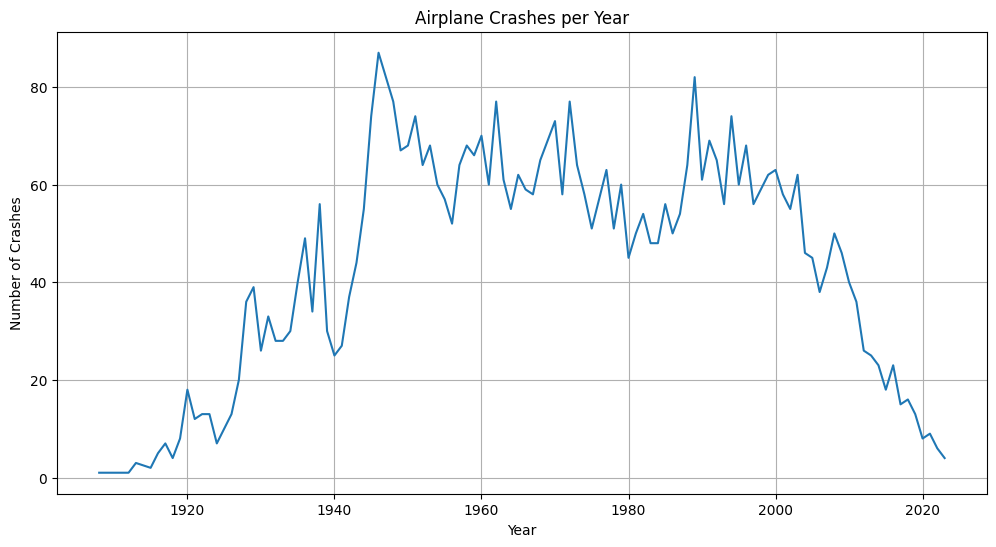

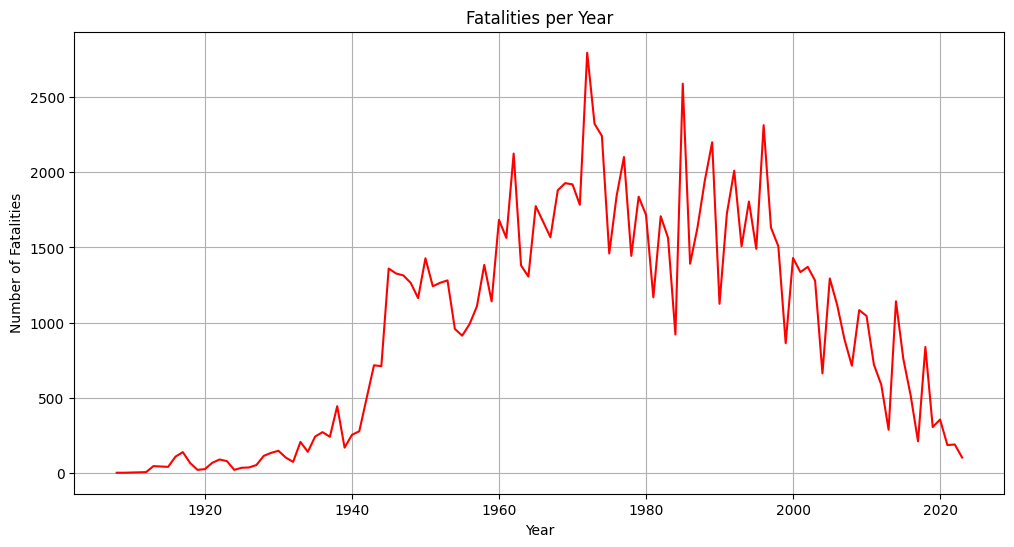

In [13]:
import matplotlib.pyplot as plt

df_cleaned.groupby('Year').size().plot(title='Airplane Crashes per Year', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()

df_cleaned.groupby('Year')['Fatalities'].sum().plot(title='Fatalities per Year', figsize=(12, 6), color='red')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.grid(True)
plt.show()


# **🛬 Step 5: Fatality Rate Analysis**

/tmp/ipython-input-14-3917098966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Fatality Rate (%)'] = (df_cleaned['Fatalities'] / df_cleaned['Aboard']) * 100
/tmp/ipython-input-14-3917098966.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Decade'] = (df_cleaned['Year'] // 10) * 10


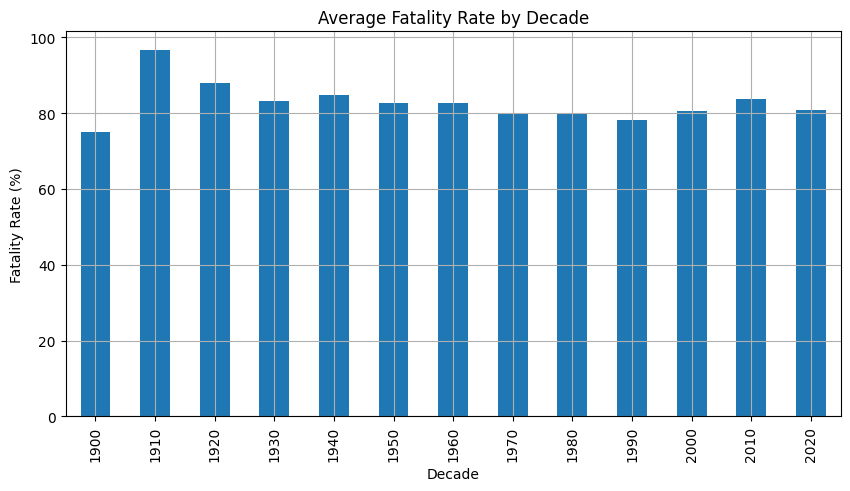

In [14]:
df_cleaned['Fatality Rate (%)'] = (df_cleaned['Fatalities'] / df_cleaned['Aboard']) * 100

df_cleaned['Decade'] = (df_cleaned['Year'] // 10) * 10
fatality_by_decade = df_cleaned.groupby('Decade')['Fatality Rate (%)'].mean()

fatality_by_decade.plot(kind='bar', title='Average Fatality Rate by Decade', figsize=(10, 5))
plt.ylabel('Fatality Rate (%)')
plt.xlabel('Decade')
plt.grid(True)
plt.show()


# **🌍 Step 6: Most Affected Locations and Operators**

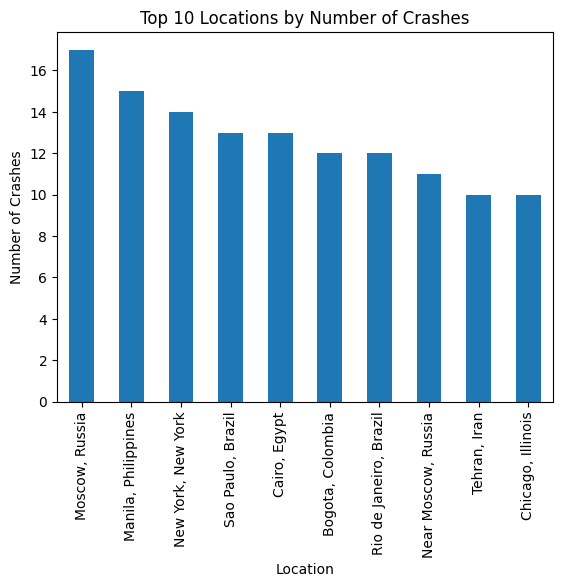

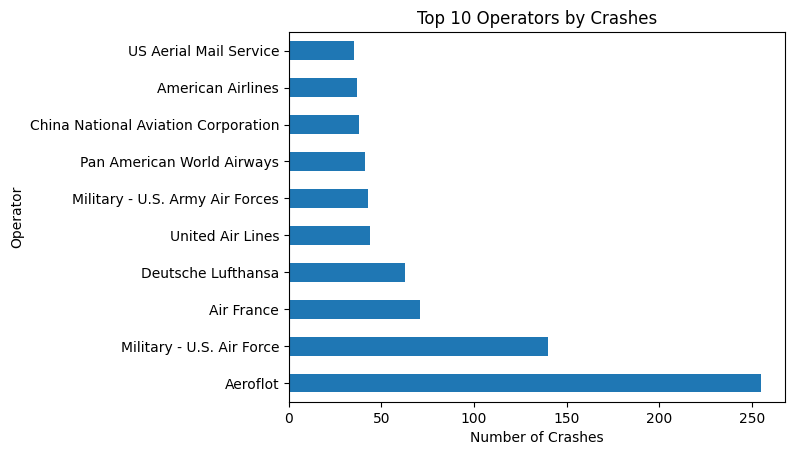

In [15]:
df_cleaned['Location'].value_counts().head(10).plot(kind='bar', title='Top 10 Locations by Number of Crashes')
plt.ylabel('Number of Crashes')
plt.show()

df_cleaned['Operator'].value_counts().head(10).plot(kind='barh', title='Top 10 Operators by Crashes')
plt.xlabel('Number of Crashes')
plt.show()


# **📌 Step 7: Deadliest Crashes of All Time**

In [16]:
top_deadly = df_cleaned.sort_values(by='Fatalities', ascending=False).head(10)
top_deadly[['Date', 'Location', 'Operator', 'AC Type', 'Aboard', 'Fatalities', 'Summary']]


,Date,Location,Operator,AC Type,Aboard,Fatalities,Summary
2885,1977-03-27,"Tenerife, Canary Islands",Pan American World Airways / KLM,Boeing B-747-121 / Boeing B-747-206B,644.0,583.0,Both aircraft were diverted to Tenerife becaus...
3324,1985-08-12,"Mt. Osutaka, near Ueno Village, Japan",Japan Air Lines,Boeing B-747-SR46,524.0,520.0,The aircraft suffered an aft pressure bulkhead...
4039,1996-11-12,"Near Charkhi Dadri, India",Saudi Arabian Airlines / Kazakhstan Airlines,Boeing B-747-168B / Ilyushin IL-76TD,349.0,349.0,Midair collision 17 km W of New Delhi. The Sa...
2720,1974-03-03,"Near Ermenonville, France",Turkish Airlines (THY),McDonnell Douglas DC-10-10,346.0,346.0,The aircraft crashed shortly after takeoff fro...
3320,1985-06-23,"Atlantic Ocean, 110 miles West of Ireland",Air India,Boeing B-747-237B,329.0,329.0,The aircraft broke up in flight and crashed in...
3076,1980-08-19,"Riyadh, Saudi Arabia",Saudi Arabian Airlines,Lockheed 1011-200 TriStar,301.0,301.0,The flight experienced a fire in the aft cargo...
4876,2014-07-17,"Hrabove, Ukraine",Malaysia Airlines,Boeing 777-2H6ER,298.0,298.0,A Boeing 777-200 airliner operating as Malays...
3482,1988-07-03,"Over the Persian Gulf, near Bandar Abbas, Iran",Iran Air,Airbus A300B2-203,290.0,290.0,The civilian Iranian airliner was shot down by...
4415,2003-02-19,"Near Shahdad, Iran",Military - Islamic Revolution's Guards Corps,Ilyushin Il-76MD,275.0,275.0,"The plane crashed into an 11,500 ft. mountain..."
3007,1979-05-25,"Chicago O'Hare, Illinois",American Airlines,McDonnell Douglas DC-10-10,271.0,271.0,"During takeoff just, as the plane lifted from ..."


# **📅 Step 8: Monthly/Seasonal Trends**

/tmp/ipython-input-17-1695355501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Month'] = df_cleaned['Date'].dt.month
/tmp/ipython-input-17-1695355501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Weekday'] = df_cleaned['Date'].dt.day_name()


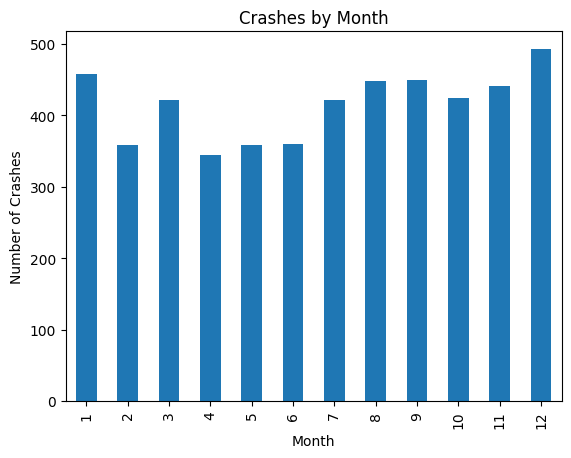

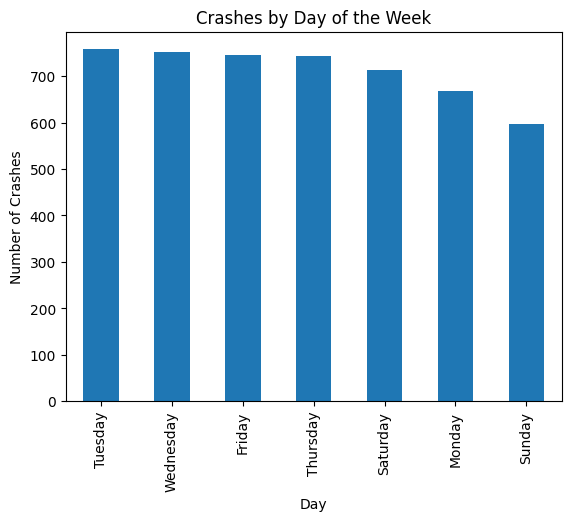

In [17]:
df_cleaned['Month'] = df_cleaned['Date'].dt.month
df_cleaned['Weekday'] = df_cleaned['Date'].dt.day_name()

df_cleaned['Month'].value_counts().sort_index().plot(kind='bar', title='Crashes by Month')
plt.xlabel('Month')
plt.ylabel('Number of Crashes')
plt.show()

df_cleaned['Weekday'].value_counts().plot(kind='bar', title='Crashes by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Number of Crashes')
plt.show()
